<a href="https://colab.research.google.com/github/sesmael/Real-Time-ML-/blob/main/homework5_probem3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
##########################################
#     ENGLISH-TO-FRENCH DATASET loader   #
##########################################
import re
import random
import math
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Provided dataset (English-French pairs)
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

# Tokenization function
def tokenize(sentence):
    sentence = sentence.lower().strip()
    return re.findall(r"\w+|[^\s\w]", sentence)

# Build a vocabulary from a list of sentences
def build_vocab(sentences):
    vocab = {"<pad>": 0, "<sos>": 1, "<eos>": 2, "<unk>": 3}
    for sent in sentences:
        for token in tokenize(sent):
            if token not in vocab:
                vocab[token] = len(vocab)
    return vocab

eng_sents = [pair[0] for pair in english_to_french]
fr_sents = [pair[1] for pair in english_to_french]
eng_vocab = build_vocab(eng_sents)
fr_vocab = build_vocab(fr_sents)

# Custom Dataset
class TranslationDataset(Dataset):
    def __init__(self, pairs, eng_vocab, fr_vocab):
        self.pairs = pairs
        self.eng_vocab = eng_vocab
        self.fr_vocab = fr_vocab

    def __len__(self):
        return len(self.pairs)

    def encode(self, sentence, vocab):
        tokens = tokenize(sentence)
        return [vocab.get(token, vocab["<unk>"]) for token in tokens]

    def __getitem__(self, idx):
        src, tgt = self.pairs[idx]
        src_indices = self.encode(src, self.eng_vocab)
        tgt_indices = [self.fr_vocab["<sos>"]] + self.encode(tgt, self.fr_vocab) + [self.fr_vocab["<eos>"]]
        return torch.tensor(src_indices), torch.tensor(tgt_indices)

# Split dataset into training and validation (e.g., 80/20 split)
train_pairs, val_pairs = train_test_split(english_to_french, test_size=0.2, random_state=42)
train_dataset = TranslationDataset(train_pairs, eng_vocab, fr_vocab)
val_dataset = TranslationDataset(val_pairs, eng_vocab, fr_vocab)

# DataLoader with padding
def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_padded = nn.utils.rnn.pad_sequence(src_batch, batch_first=True, padding_value=eng_vocab["<pad>"])
    tgt_padded = nn.utils.rnn.pad_sequence(tgt_batch, batch_first=True, padding_value=fr_vocab["<pad>"])
    return src_padded, tgt_padded

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)


In [19]:
#######################################################
#   Problem 1: ain and validate a transformer model,  #
#   for learning the above sequence. Use sequence     #
#   lengths of 10, 20, and 30 for your training       #
#######################################################
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

# ---------------------------
# (Assume the full English-to-French dataset is already loaded in your Colab file)
# ---------------------------

# ---------------------------
# 1. Preparing the Next Character Prediction Dataset
# ---------------------------
sequence_text = (
    "Next character prediction is a fundamental task in the field of natural language processing (NLP) that involves predicting "
    "the next character in a sequence of text based on the characters that precede it. This task is essential for various "
    "applications, including text auto-completion, spell checking, and even in the development of sophisticated AI models capable "
    "of generating human-like text. At its core, next character prediction relies on statistical models or deep learning algorithms "
    "to analyze a given sequence of text and predict which character is most likely to follow. These predictions are based on patterns "
    "and relationships learned from large datasets of text during the training phase of the model. One of the most popular approaches to "
    "next character prediction involves the use of Recurrent Neural Networks (RNNs), and more specifically, a variant called Long "
    "Short-Term Memory (LSTM) networks. RNNs are particularly well-suited for sequential data like text, as they can maintain "
    "information in 'memory' about previous characters to inform the prediction of the next character. LSTM networks enhance this capability "
    "by being able to remember long-term dependencies, making them even more effective for next character prediction tasks. "
    "Training a model for next character prediction involves feeding it large amounts of text data, allowing it to learn the probability "
    "of each character's appearance following a sequence of characters. During this training process, the model adjusts its parameters "
    "to minimize the difference between its predictions and the actual outcomes, thus improving its predictive accuracy over time. "
    "Once trained, the model can be used to predict the next character in a given piece of text by considering the sequence of characters "
    "that precede it. This can enhance user experience in text editing software, improve efficiency in coding environments with auto-completion "
    "features, and enable more natural interactions with AI-based chatbots and virtual assistants. In summary, next character prediction plays "
    "a crucial role in enhancing the capabilities of various NLP applications, making text-based interactions more efficient, accurate, and human-like. "
    "Through the use of advanced machine learning models like RNNs and LSTMs, next character prediction continues to evolve, opening new possibilities "
    "for the future of text-based technology."
)

# Build a character vocabulary and map characters to indices
vocab = sorted(set(sequence_text))
vocab_size = len(vocab)
char_to_idx = {ch: i for i, ch in enumerate(vocab)}
idx_to_char = {i: ch for i, ch in enumerate(vocab)}

def text_to_indices(text):
    return [char_to_idx[ch] for ch in text]

data_indices = text_to_indices(sequence_text)

def create_dataset(seq_len):
    X, y = [], []
    for i in range(len(data_indices) - seq_len):
        X.append(data_indices[i:i+seq_len])
        y.append(data_indices[i+seq_len])
    return np.array(X), np.array(y)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ---------------------------
# 2. Define the Models
# ---------------------------
# Transformer-based model for next character prediction
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_heads=4, hidden_dim=256, num_layers=2, seq_len=20, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embed_dim = embed_dim
        self.seq_len = seq_len
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_embedding = nn.Parameter(torch.zeros(1, seq_len, embed_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)           # (batch, seq_len, embed_dim)
        x = x + self.pos_embedding       # add positional info
        x = x.transpose(0, 1)            # (seq_len, batch, embed_dim)
        x = self.transformer_encoder(x)
        out = x[-1]                     # last time step
        out = self.fc_out(out)
        return out

# Standard LSTM-based model for next character prediction
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=1, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.lstm(x)
        out = self.fc_out(output[:, -1, :])
        return out

# LSTM with Attention (without a separate decoder) for next character prediction
class LSTMWithAttention(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=1, dropout=0.0):
        super(LSTMWithAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=4, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)                    # (batch, seq_len, hidden_dim)
        lstm_out = lstm_out.transpose(0, 1)             # (seq_len, batch, hidden_dim)
        query = lstm_out[-1].unsqueeze(0)              # (1, batch, hidden_dim)
        attn_output, _ = self.attention(query, lstm_out, lstm_out)
        attn_output = attn_output.squeeze(0)           # (batch, hidden_dim)
        out = self.fc_out(attn_output)
        return out

# Encoder-Decoder with Cross-Attention
class EncoderDecoderWithAttention(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=1, dropout=0.0):
        super(EncoderDecoderWithAttention, self).__init__()
        # Shared embedding for both encoder and decoder
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # Encoder: processes the input sequence.
        self.encoder = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)

        # Decoder: a single-step LSTM decoder.
        self.decoder = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        # Learned start token for the decoder input.
        self.start_token = nn.Parameter(torch.randn(1, embed_dim))

        # Cross-attention: decoder queries attend to encoder outputs.
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=4, dropout=dropout)

        # Final prediction layer.
        self.fc_out = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        # x: (batch, seq_len)
        batch_size = x.size(0)

        # Encode input sequence.
        encoder_emb = self.embedding(x)                   # (batch, seq_len, embed_dim)
        encoder_outputs, (hn, cn) = self.encoder(encoder_emb)  # (batch, seq_len, hidden_dim)

        # Prepare decoder input: use learned start token for each batch.
        decoder_input = self.start_token.expand(batch_size, 1, -1)  # (batch, 1, embed_dim)
        decoder_output, _ = self.decoder(decoder_input, (hn, cn))    # (batch, 1, hidden_dim)

        # Prepare for attention: query from decoder, keys and values from encoder outputs.
        decoder_output = decoder_output.transpose(0, 1)       # (1, batch, hidden_dim)
        encoder_outputs_t = encoder_outputs.transpose(0, 1)   # (seq_len, batch, hidden_dim)

        attn_output, _ = self.attention(decoder_output, encoder_outputs_t, encoder_outputs_t)
        attn_output = attn_output.squeeze(0)                  # (batch, hidden_dim)
        output = self.fc_out(attn_output)                     # (batch, vocab_size)
        return output

# ---------------------------
# 3. Training and Evaluation Functions
# ---------------------------
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(dataloader)

def evaluate_model(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)
    return correct / total

# ---------------------------
# 4. Experiment Setup and Training Loop
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 64
learning_rate = 1e-3
seq_lengths = [10, 20, 30]

final_results = {}

for seq_len in seq_lengths:
    print(f"\n--- Sequence Length: {seq_len} ---")
    X, y = create_dataset(seq_len)
    split_idx = int(0.8 * len(X))
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_val, y_val = X[split_idx:], y[split_idx:]

    train_dataset = TextDataset(X_train, y_train)
    val_dataset = TextDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    models = {
        "Transformer": TransformerModel(vocab_size, seq_len=seq_len).to(device),
        "LSTM": LSTMModel(vocab_size).to(device),
        "LSTM+Attn": LSTMWithAttention(vocab_size).to(device),
        "EncDec+Attn": EncoderDecoderWithAttention(vocab_size).to(device)
    }

    final_results[seq_len] = {}

    for model_name, model in models.items():
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        print(f"\nTraining {model_name} for sequence length {seq_len}:")
        start_time = time.time()
        final_train_loss = None

        for epoch in range(num_epochs):
            train_loss = train_model(model, train_loader, criterion, optimizer, device)
            val_acc = evaluate_model(model, val_loader, device)
            final_train_loss = train_loss
            if (epoch + 1) % 5 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

        total_time = time.time() - start_time
        final_val_acc = evaluate_model(model, val_loader, device)

        final_results[seq_len][model_name] = {
            "Final_Train_Loss": final_train_loss,
            "Final_Val_Accuracy": final_val_acc,
            "Total_Time_sec": total_time
        }
        print(f"Final {model_name} - Train Loss: {final_train_loss:.4f}, Val Acc: {final_val_acc:.4f}, Time: {total_time:.2f} sec")

print("\n\n--- Overall Comparison of Models ---")
for seq_len, model_results in final_results.items():
    print(f"\nSequence Length: {seq_len}")
    for model_name, metrics in model_results.items():
        print(f"{model_name}: Train Loss = {metrics['Final_Train_Loss']:.4f}, Val Acc = {metrics['Final_Val_Accuracy']:.4f}, Time = {metrics['Total_Time_sec']:.2f} sec")



--- Sequence Length: 10 ---

Training Transformer for sequence length 10:
Epoch 1/20 | Train Loss: 2.9288 | Val Acc: 0.2353
Epoch 5/20 | Train Loss: 1.9902 | Val Acc: 0.3382
Epoch 10/20 | Train Loss: 1.4655 | Val Acc: 0.3361
Epoch 15/20 | Train Loss: 0.9967 | Val Acc: 0.3487
Epoch 20/20 | Train Loss: 0.6993 | Val Acc: 0.3739
Final Transformer - Train Loss: 0.6993, Val Acc: 0.3739, Time: 3.99 sec

Training LSTM for sequence length 10:
Epoch 1/20 | Train Loss: 3.1318 | Val Acc: 0.2122
Epoch 5/20 | Train Loss: 1.8221 | Val Acc: 0.4097
Epoch 10/20 | Train Loss: 1.1257 | Val Acc: 0.4622
Epoch 15/20 | Train Loss: 0.6115 | Val Acc: 0.4454
Epoch 20/20 | Train Loss: 0.2743 | Val Acc: 0.4370
Final LSTM - Train Loss: 0.2743, Val Acc: 0.4370, Time: 2.01 sec

Training LSTM+Attn for sequence length 10:
Epoch 1/20 | Train Loss: 3.1916 | Val Acc: 0.1345
Epoch 5/20 | Train Loss: 2.2018 | Val Acc: 0.3109
Epoch 10/20 | Train Loss: 1.1404 | Val Acc: 0.4034
Epoch 15/20 | Train Loss: 0.3616 | Val Acc: 0.39

In [22]:
#####################################################################
#      PROBLEM 3:
#####################################################################


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        # Create constant 'pe' matrix with values dependent on
        # pos and i
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # shape: (max_len, 1, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: (seq_len, batch_size, d_model)
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

class TransformerSeq2Seq(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=256, nhead=4, num_encoder_layers=2, num_decoder_layers=2, dim_feedforward=512, dropout=0.1):
        super(TransformerSeq2Seq, self).__init__()
        self.d_model = d_model
        self.src_embedding = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.transformer = nn.Transformer(d_model, nhead, num_encoder_layers, num_decoder_layers, dim_feedforward, dropout)
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src, tgt):
        # src and tgt shape: (batch_size, seq_len)
        # Transpose to shape: (seq_len, batch_size)
        src = src.transpose(0, 1)
        tgt = tgt.transpose(0, 1)
        src_emb = self.src_embedding(src) * math.sqrt(self.d_model)
        tgt_emb = self.tgt_embedding(tgt) * math.sqrt(self.d_model)
        src_emb = self.pos_encoder(src_emb)
        tgt_emb = self.pos_encoder(tgt_emb)
        output = self.transformer(src_emb, tgt_emb)
        output = self.fc_out(output)
        return output



In [17]:
def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for src, tgt in data_loader:
        src, tgt = src.to(device), tgt.to(device)
        optimizer.zero_grad()
        # Use teacher forcing: input target sequence except last token
        tgt_input = tgt[:, :-1]
        # Expected output: target sequence except first token
        tgt_out = tgt[:, 1:]
        output = model(src, tgt_input)
        # output shape: (tgt_seq_len, batch, vocab_size) -> transpose back
        output = output.transpose(0, 1).reshape(-1, output.shape[-1])
        tgt_out = tgt_out.reshape(-1)
        loss = criterion(output, tgt_out)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for src, tgt in data_loader:
            src, tgt = src.to(device), tgt.to(device)
            tgt_input = tgt[:, :-1]
            tgt_out = tgt[:, 1:]
            output = model(src, tgt_input)
            output = output.transpose(0, 1).reshape(-1, output.shape[-1])
            tgt_out = tgt_out.reshape(-1)
            loss = criterion(output, tgt_out)
            total_loss += loss.item()
    return total_loss / len(data_loader)


In [11]:
def translate_sentence(model, sentence, eng_vocab, fr_vocab, max_len=20):
    model.eval()
    tokens = tokenize(sentence)
    src_indices = [eng_vocab.get(token, eng_vocab["<unk>"]) for token in tokens]
    src_tensor = torch.tensor(src_indices).unsqueeze(0).to(device)  # shape: (1, seq_len)

    tgt_indices = [fr_vocab["<sos>"]]
    for _ in range(max_len):
        tgt_tensor = torch.tensor(tgt_indices).unsqueeze(0).to(device)  # (1, current_len)
        output = model(src_tensor, tgt_tensor)
        # output shape: (tgt_seq_len, batch, vocab_size)
        next_token = output.argmax(-1)[-1, 0].item()
        tgt_indices.append(next_token)
        if next_token == fr_vocab["<eos>"]:
            break
    # Create inverse vocabulary mapping for French tokens
    inv_fr_vocab = {idx: token for token, idx in fr_vocab.items()}
    translation = [inv_fr_vocab.get(idx, "<unk>") for idx in tgt_indices[1:-1]]  # remove <sos> and <eos>
    return " ".join(translation)

# Example qualitative test with one of the trained models:
sample_sentence = "I am cold"
# Choose one model configuration to test (for example, Transformer_2_2)
test_model = results["Transformer_2_2"]["model"]
print("Input:", sample_sentence)
print("Translation:", translate_sentence(test_model, sample_sentence, eng_vocab, fr_vocab))


Input: I am cold
Translation: elle porte une robe rouge


In [7]:
# RNN Encoder
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, src):
        embedded = self.embedding(src)
        outputs, hidden = self.rnn(embedded)
        return outputs, hidden

# RNN Decoder without Attention
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        # input shape: (batch,) -> add time dimension
        input = input.unsqueeze(1)
        embedded = self.embedding(input)
        output, hidden = self.rnn(embedded, hidden)
        output = self.out(output.squeeze(1))
        return output, hidden

# RNN Decoder with Attention (simplified version)
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attn = nn.Linear(hidden_size * 2, 50)  # Attention layer dimension
        self.attn_combine = nn.Linear(hidden_size * 2, hidden_size)
        self.dropout = nn.Dropout(dropout_p)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).unsqueeze(1)
        embedded = self.dropout(embedded)
        # Calculate attention weights
        attn_weights = F.softmax(self.attn(torch.cat((embedded.squeeze(1), hidden.squeeze(0)), dim=1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)
        output = torch.cat((embedded.squeeze(1), attn_applied.squeeze(1)), dim=1)
        output = self.attn_combine(output).unsqueeze(1)
        output, hidden = self.rnn(output, hidden)
        output = self.out(output.squeeze(1))
        return output, hidden

# You can create training and evaluation loops for these RNN models similar to the Transformer loops above.


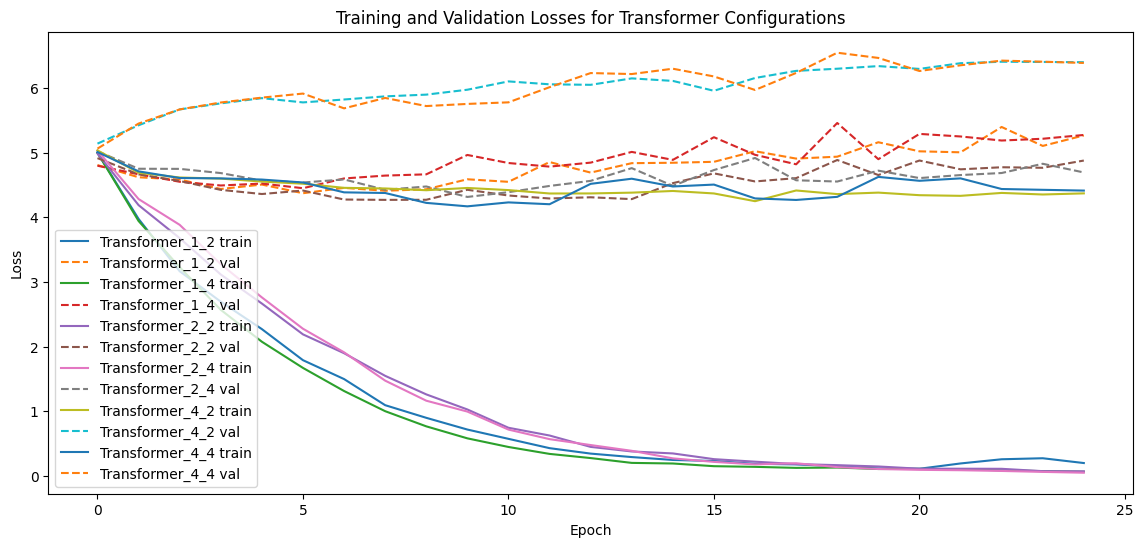

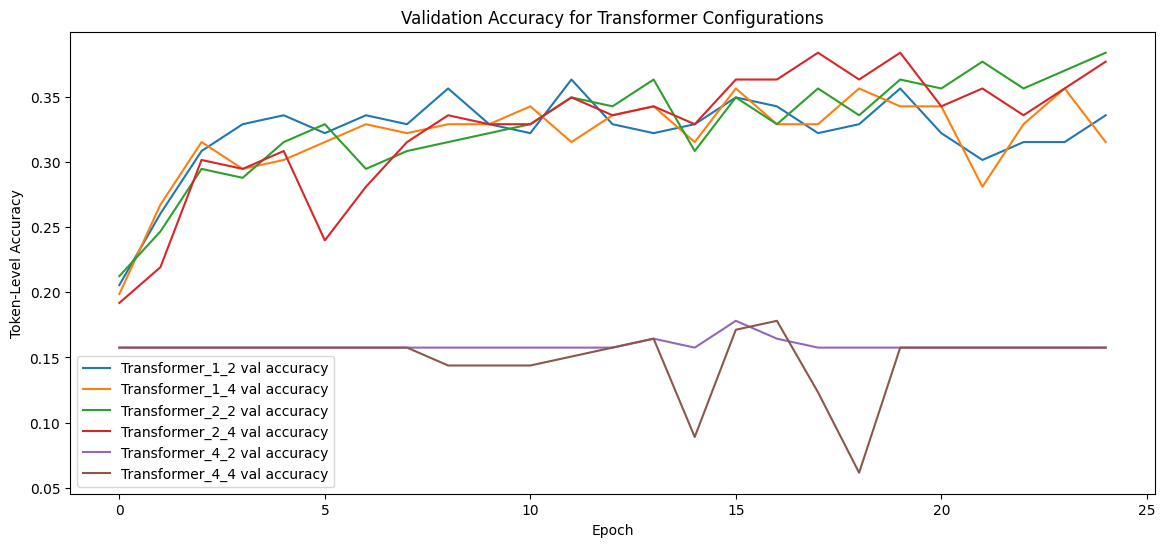

In [12]:
import matplotlib.pyplot as plt

# Plot Losses
plt.figure(figsize=(14, 6))
for key, res in results.items():
    plt.plot(res["train_loss"], label=f"{key} train")
    plt.plot(res["val_loss"], label=f"{key} val", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses for Transformer Configurations")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(14, 6))
for key, res in results.items():
    plt.plot(res["val_accuracy"], label=f"{key} val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Token-Level Accuracy")
plt.title("Validation Accuracy for Transformer Configurations")
plt.legend()
plt.show()



Training French-to-English Transformer with 1 layers and 2 heads
Epoch  1: train_loss=4.6796, val_loss=4.4376, val_acc=31.71%
Epoch  2: train_loss=3.6433, val_loss=4.0618, val_acc=35.77%
Epoch  3: train_loss=2.9769, val_loss=4.1145, val_acc=39.84%
Epoch  4: train_loss=2.4452, val_loss=4.1663, val_acc=39.84%
Epoch  5: train_loss=1.8758, val_loss=4.1810, val_acc=38.21%
Epoch  6: train_loss=1.5590, val_loss=4.2372, val_acc=36.59%
Epoch  7: train_loss=1.2612, val_loss=4.2649, val_acc=38.21%
Epoch  8: train_loss=0.9586, val_loss=4.4051, val_acc=35.77%
Epoch  9: train_loss=0.7911, val_loss=4.6108, val_acc=35.77%
Epoch 10: train_loss=0.6738, val_loss=4.4942, val_acc=37.40%
Epoch 11: train_loss=0.5192, val_loss=4.3797, val_acc=39.02%
Epoch 12: train_loss=0.4946, val_loss=4.5974, val_acc=36.59%
Epoch 13: train_loss=0.4126, val_loss=4.5475, val_acc=32.52%
Epoch 14: train_loss=0.3405, val_loss=4.7976, val_acc=39.84%
Epoch 15: train_loss=0.2490, val_loss=4.8509, val_acc=34.96%
Epoch 16: train_los

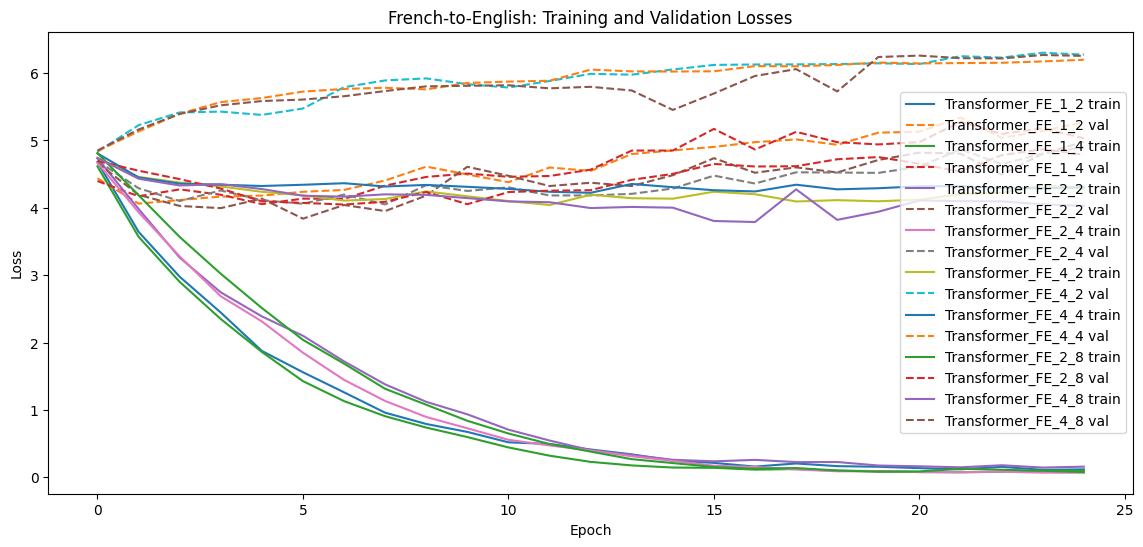

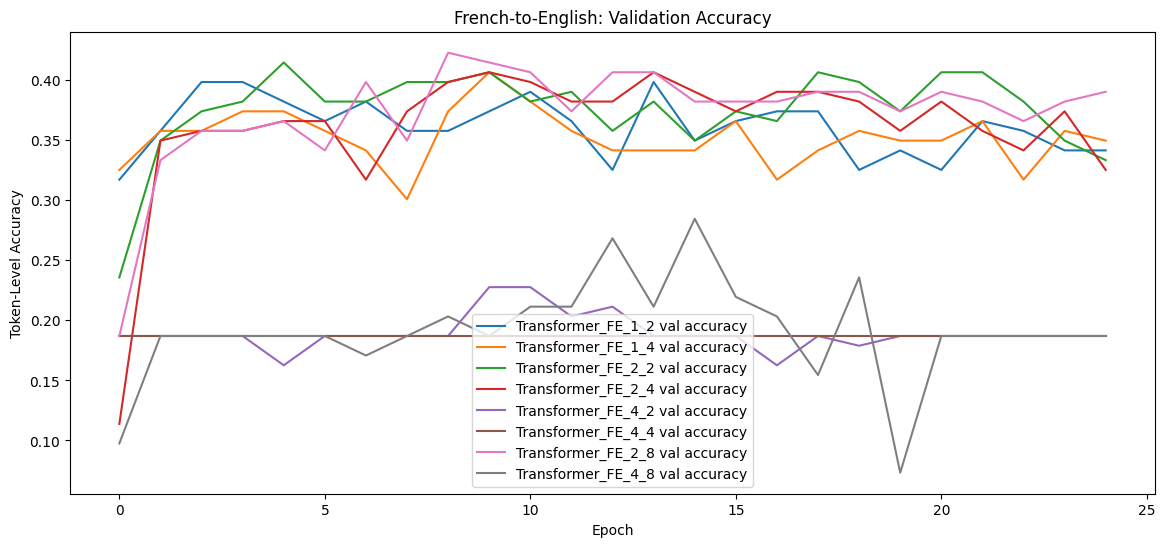

In [13]:
# ####################################################
# PROBLEM 4:  Data Preparation (French-to-English)
# ####################################################
# (Our dataset 'english_to_french' is defined as (English, French)).
# For French-to-English, we swap the order.

class TranslationDataset_FE(Dataset):
    def __init__(self, pairs, eng_vocab, fr_vocab):
        # Here, for French-to-English, the source is French and target is English.
        self.pairs = pairs
        self.eng_vocab = eng_vocab
        self.fr_vocab = fr_vocab

    def __len__(self):
        return len(self.pairs)

    def encode(self, sentence, vocab):
        tokens = tokenize(sentence)
        return [vocab.get(token, vocab["<unk>"]) for token in tokens]

    def __getitem__(self, idx):
        # Swap: source = French, target = English.
        eng, fr = self.pairs[idx]
        src = fr  # French sentence as source.
        tgt = eng # English sentence as target.
        src_indices = self.encode(src, self.fr_vocab)
        tgt_indices = [self.eng_vocab["<sos>"]] + self.encode(tgt, self.eng_vocab) + [self.eng_vocab["<eos>"]]
        return torch.tensor(src_indices), torch.tensor(tgt_indices)

# Build vocabularies (we already built them in previous cells)
# Here, eng_vocab remains for English and fr_vocab for French.
# (If not defined already, run the tokenization and build_vocab functions.)

# Split the data into training and validation (80/20 split)
train_pairs_fe, val_pairs_fe = train_test_split(english_to_french, test_size=0.2, random_state=42)
train_dataset_fe = TranslationDataset_FE(train_pairs_fe, eng_vocab, fr_vocab)
val_dataset_fe = TranslationDataset_FE(val_pairs_fe, eng_vocab, fr_vocab)

# DataLoader with padding (same collate_fn as before)
def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_padded = nn.utils.rnn.pad_sequence(src_batch, batch_first=True, padding_value=fr_vocab["<pad>"])
    tgt_padded = nn.utils.rnn.pad_sequence(tgt_batch, batch_first=True, padding_value=eng_vocab["<pad>"])
    return src_padded, tgt_padded

train_loader_fe = DataLoader(train_dataset_fe, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader_fe = DataLoader(val_dataset_fe, batch_size=8, shuffle=False, collate_fn=collate_fn)


# ===============================
# 2. Transformer Model (reuse our earlier definition)
# ===============================
# (The same TransformerSeq2Seq model works, but note that:
#   - src_vocab_size now is len(fr_vocab) (French vocabulary)
#   - tgt_vocab_size now is len(eng_vocab) (English vocabulary)
# Also, our PositionalEncoding and TransformerSeq2Seq classes remain unchanged.)

# (Assuming PositionalEncoding and TransformerSeq2Seq classes have been defined above.)


# ===============================
# 3. Training & Evaluation Functions (with Accuracy)
# ===============================
def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for src, tgt in data_loader:
        src, tgt = src.to(device), tgt.to(device)
        optimizer.zero_grad()
        # Teacher forcing: input target sequence except last token.
        tgt_input = tgt[:, :-1]
        tgt_out = tgt[:, 1:]
        output = model(src, tgt_input)  # output shape: (tgt_seq_len, batch, vocab_size)
        output = output.transpose(0, 1).reshape(-1, output.shape[-1])
        tgt_out = tgt_out.reshape(-1)
        loss = criterion(output, tgt_out)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate_with_accuracy(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_tokens = 0
    with torch.no_grad():
        for src, tgt in data_loader:
            src, tgt = src.to(device), tgt.to(device)
            tgt_input = tgt[:, :-1]
            tgt_out = tgt[:, 1:]
            output = model(src, tgt_input)
            output = output.transpose(0, 1)  # (batch, seq_len, vocab_size)
            loss = criterion(output.reshape(-1, output.shape[-1]), tgt_out.reshape(-1))
            total_loss += loss.item()
            preds = output.argmax(dim=-1)  # (batch, seq_len)
            non_pad_mask = tgt_out != eng_vocab["<pad>"]
            correct = (preds == tgt_out) & non_pad_mask
            total_correct += correct.sum().item()
            total_tokens += non_pad_mask.sum().item()
    avg_loss = total_loss / len(data_loader)
    accuracy = total_correct / total_tokens if total_tokens > 0 else 0
    return avg_loss, accuracy


# ===============================
# 4. Experiment: Train 8 Transformer Configurations
# ===============================
# We now include eight combinations. (We use the previous choices of layers (1,2,4)
# with heads 2 and 4, plus two extra configurations with heads=8.)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
configurations = [
    {"num_layers": 1, "nhead": 2},
    {"num_layers": 1, "nhead": 4},
    {"num_layers": 2, "nhead": 2},
    {"num_layers": 2, "nhead": 4},
    {"num_layers": 4, "nhead": 2},
    {"num_layers": 4, "nhead": 4},
    {"num_layers": 2, "nhead": 8},
    {"num_layers": 4, "nhead": 8},
]

results_fe = {}
num_epochs = 25  # Train for 25 epochs

for config in configurations:
    print(f"\nTraining French-to-English Transformer with {config['num_layers']} layers and {config['nhead']} heads")
    model = TransformerSeq2Seq(
        src_vocab_size=len(fr_vocab),  # source: French
        tgt_vocab_size=len(eng_vocab),  # target: English
        d_model=256,
        nhead=config['nhead'],
        num_encoder_layers=config['num_layers'],
        num_decoder_layers=config['num_layers']
    ).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss(ignore_index=eng_vocab["<pad>"])

    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader_fe, optimizer, criterion, device)
        val_loss, val_acc = evaluate_with_accuracy(model, val_loader_fe, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1:2d}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc*100:.2f}%")

    key = f"Transformer_FE_{config['num_layers']}_{config['nhead']}"
    results_fe[key] = {
        "train_loss": train_losses,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies,
        "model": model
    }


# ===============================
# 5. Qualitative Validation: Inference Function
# ===============================
def translate_sentence_FE(model, sentence, fr_vocab, eng_vocab, max_len=20):
    model.eval()
    # Tokenize French sentence (source)
    tokens = tokenize(sentence)
    src_indices = [fr_vocab.get(token, fr_vocab["<unk>"]) for token in tokens]
    src_tensor = torch.tensor(src_indices).unsqueeze(0).to(device)  # (1, seq_len)

    # Start with <sos> for target (English)
    tgt_indices = [eng_vocab["<sos>"]]
    for _ in range(max_len):
        tgt_tensor = torch.tensor(tgt_indices).unsqueeze(0).to(device)
        output = model(src_tensor, tgt_tensor)
        next_token = output.argmax(dim=-1)[-1, 0].item()
        tgt_indices.append(next_token)
        if next_token == eng_vocab["<eos>"]:
            break
    # Build inverse mapping for English tokens
    inv_eng_vocab = {idx: token for token, idx in eng_vocab.items()}
    translation = [inv_eng_vocab.get(idx, "<unk>") for idx in tgt_indices[1:-1]]  # Remove <sos> and <eos>
    return " ".join(translation)

# Example qualitative test:
sample_french = "J'ai froid"  # French sentence (originally paired with "I am cold")
# Choose one trained model configuration for testing (for example, Transformer_FE_2_2)
test_model_fe = results_fe["Transformer_FE_2_2"]["model"]
print("French Input:", sample_french)
print("English Translation:", translate_sentence_FE(test_model_fe, sample_french, fr_vocab, eng_vocab))


# ===============================
# 6. Plotting the Results for French-to-English
# ===============================
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for key, res in results_fe.items():
    plt.plot(res["train_loss"], label=f"{key} train")
    plt.plot(res["val_loss"], label=f"{key} val", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("French-to-English: Training and Validation Losses")
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
for key, res in results_fe.items():
    plt.plot(res["val_accuracy"], label=f"{key} val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Token-Level Accuracy")
plt.title("French-to-English: Validation Accuracy")
plt.legend()
plt.show()
